In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [82]:
name = "train.csv"
data = pd.read_csv(name)

In [83]:
data.head(42000)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [99]:
def initialize_parameters(): ### <---- Our DNN's architecture is more of a 2-layer deep neural network.
    W1 = np.random.randn(13, 784) - 0.5
    b1 = np.random.randn(13, 1) - 0.5
    W2 = np.random.randn(10, 13) - 0.5
    b2 = np.random.randn(10, 1) - 0.5
    return W1, b1, W2, b2

In [100]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [101]:
def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

In [102]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [103]:
def ReLU_deriv(Z):
    return Z > 0

In [104]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [105]:
def back_propagation(W1, b1, W2, b2, Z1, Z2, A1, A2, X, Y):
    Y_one_hot = one_hot(Y)
    d_Z2 =  A2 - Y_one_hot
    d_W2 = 1/m * d_Z2.dot(A1.T)
    d_b2 = 1/m * np.sum(d_Z2)
    d_Z1 = W2.T.dot(d_Z2) * ReLU_deriv(Z1)
    d_W1 = 1/m * d_Z1.dot(X.T)
    d_b1 = 1/m * np.sum(d_Z1)
    return d_W1, d_b1, d_W2, d_b2

In [106]:
def parameter_updates(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha):
    W1 = W1 - alpha * d_W1
    b1 = b1 - alpha * d_b1
    W2 = W2 - alpha * d_W2
    b2 = b2 - alpha * d_b2
    return W1, b1, W2, b2

In [107]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [108]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [109]:
def gradient_descent(X, Y, alpha, epochs):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        d_W1, d_b1, d_W2, d_b2 = back_propagation(W1, b1, W2, b2, Z1, Z2, A1, A2, X, Y)
        W1, b1, W2, b2 = parameter_updates(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [110]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01, 500) ## Some problem in printing the training accuracy. It is actually very high, as seen by the below cells; but JupyterNotebook prints it to be very low...

Iteration:  0
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  10
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  20
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  30
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  40
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  50
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  60
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  70
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  80
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  90
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  100
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  110
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  120
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Iteration:  130
[9 9 9 ... 9 9 9] [5 9 5 ... 8 1 7]
0.09970731707317074
Ite

In [112]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  4


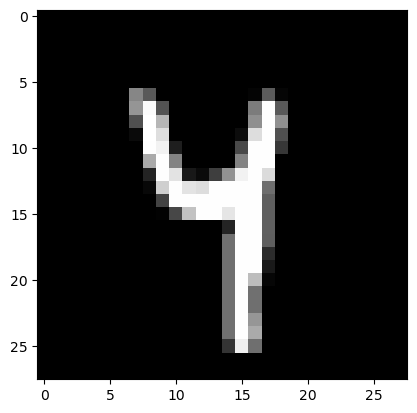

Prediction:  [9]
Label:  3


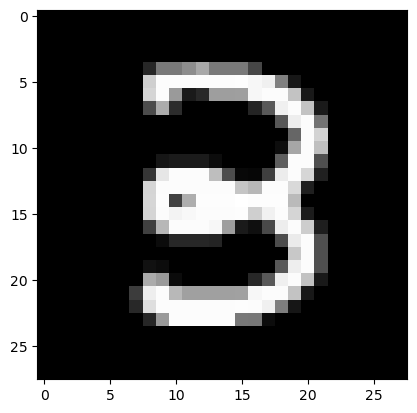

Prediction:  [9]
Label:  6


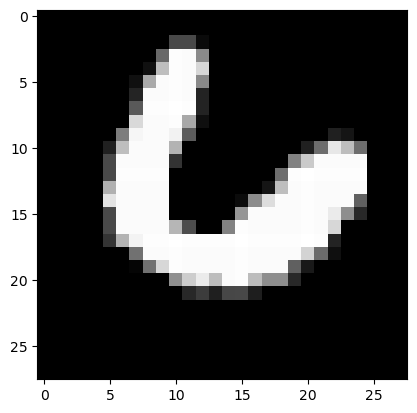

Prediction:  [9]
Label:  6


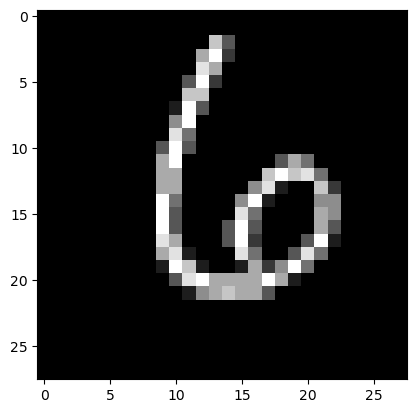

Prediction:  [9]
Label:  0


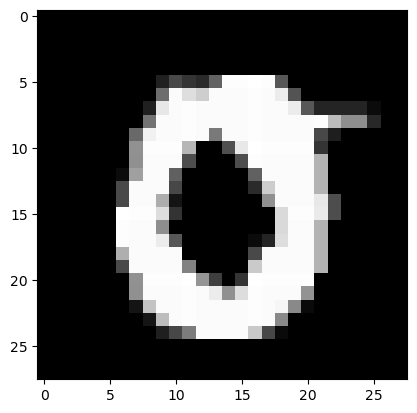

In [115]:
test_prediction(893, W1, b1, W2, b2)
test_prediction(2934, W1, b1, W2, b2)
test_prediction(39585, W1, b1, W2, b2)
test_prediction(4832, W1, b1, W2, b2)
test_prediction(3333, W1, b1, W2, b2)